In [ ]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.graph_objs as go

### Read datasets

In [93]:
#Read datasets
aa = pd.read_csv("/Users/sergiers/Desktop/CleanDataset/data_wwtp_all_flow_1.5years/Aarle.csv",delimiter=";")
db = pd.read_csv("/Users/sergiers/Desktop/CleanDataset/data_wwtp_all_flow_1.5years/Den_Bosch.csv",delimiter=",")
di = pd.read_csv("/Users/sergiers/Desktop/CleanDataset/data_wwtp_all_flow_1.5years/Dinther.csv",delimiter=";")
la = pd.read_csv("/Users/sergiers/Desktop/CleanDataset/data_wwtp_all_flow_1.5years/Land_van_Cuijk.csv",delimiter=";")
oi = pd.read_csv("/Users/sergiers/Desktop/CleanDataset/data_wwtp_all_flow_1.5years/Oijen.csv",delimiter=";")
vi = pd.read_csv("/Users/sergiers/Desktop/CleanDataset/data_wwtp_all_flow_1.5years/Vinkel.csv",delimiter=";")

In [94]:
#Take only this two columns
aa = aa[["TimeStamp", "Value"]]
db = db[["TimeStamp", "Value"]]
di = di[["TimeStamp", "Value"]]
la = la[["TimeStamp", "Value"]]
oi = oi[["TimeStamp", "Value"]]
vi = vi[["TimeStamp", "Value"]]

In [99]:
#Parse dates
aa["TimeStamp"] = pd.to_datetime(aa['TimeStamp'], format='%d-%m-%Y %H:%M:%S')
db["TimeStamp"] = pd.to_datetime(db['TimeStamp'], format='%Y-%m-%d %H:%M:%S')
di["TimeStamp"] = pd.to_datetime(di['TimeStamp'], format='%d-%m-%Y %H:%M:%S')
la["TimeStamp"] = pd.to_datetime(la['TimeStamp'], format='%d-%m-%Y %H:%M:%S')
oi["TimeStamp"] = pd.to_datetime(oi['TimeStamp'], format='%d-%m-%Y %H:%M:%S')
vi["TimeStamp"] = pd.to_datetime(vi['TimeStamp'], format='%d-%m-%Y %H:%M:%S')

In [100]:
#Create weekday column
aa['weekday'] = aa['TimeStamp'].apply(lambda x: x.weekday())
db['weekday'] = db['TimeStamp'].apply(lambda x: x.weekday())
di['weekday'] = di['TimeStamp'].apply(lambda x: x.weekday())
la['weekday'] = la['TimeStamp'].apply(lambda x: x.weekday())
oi['weekday'] = oi['TimeStamp'].apply(lambda x: x.weekday())
vi['weekday'] = vi['TimeStamp'].apply(lambda x: x.weekday())

In [102]:
#Create an index...
aa.index = aa["TimeStamp"]
db.index = db["TimeStamp"]
di.index = di["TimeStamp"]
la.index = la["TimeStamp"]
oi.index = oi["TimeStamp"]
vi.index = vi["TimeStamp"]

In [103]:
#...And delete the old timestamp column, because now timestamp is the index
del aa["TimeStamp"]
del db["TimeStamp"]
del di["TimeStamp"]
del la["TimeStamp"]
del oi["TimeStamp"]
del vi["TimeStamp"]

In [124]:
# Aarle rixtel has 4y of data, while other regions only 1.5. Take only 1.5y of aarle
aa = aa.loc['2017-01-01':]

### In the following lines, we enure the data is correct

In [125]:
aa.head(1)

,Value,weekday
TimeStamp,,
2017-01-01,3223.787,6


In [126]:
aa.tail(1)

,Value,weekday
TimeStamp,,
2018-08-07,2117.934,1


In [107]:
db.head(1)

,Value,weekday
TimeStamp,,
2017-01-01,972.805064,6


In [108]:
db.tail(1)

,Value,weekday
TimeStamp,,
2018-08-07,2039.0,1


In [109]:
di.head(1)

,Value,weekday
TimeStamp,,
2017-01-01 00:00:30,1159.0,6


In [110]:
di.tail(1)

,Value,weekday
TimeStamp,,
2018-08-07,1444.0,1


In [111]:
la.head(1)

,Value,weekday
TimeStamp,,
2017-01-01 00:00:05,112.0,6


In [112]:
la.tail(1)

,Value,weekday
TimeStamp,,
2018-08-07,914.0,1


In [113]:
oi.head(1)

,Value,weekday
TimeStamp,,
2017-01-01 00:00:05,1606.0,6


In [114]:
oi.tail(1)

,Value,weekday
TimeStamp,,
2018-08-06 23:59:55,1481.0,0


In [115]:
vi.head(1)

,Value,weekday
TimeStamp,,
2017-01-01 00:00:30,222.794876,6


In [116]:
vi.tail(1)

,Value,weekday
TimeStamp,,
2018-08-07,394.231201,1


### Process the data

In [129]:
# Resample data. Now data is grouped by hours (using mean)
aa = aa.resample('60T').mean()
db = db.resample('60T').mean()
di = di.resample('60T').mean()
la = la.resample('60T').mean()
oi = oi.resample('60T').mean()
vi = vi.resample('60T').mean()

In [ ]:
# Create a 2017 comparison:

In [134]:
# take dates until 31DEC 2017
aa17 = aa.loc[:'2017-12-31']
db17 = db.loc[:'2017-12-31']
di17 = di.loc[:'2017-12-31']
la17 = la.loc[:'2017-12-31']
oi17 = oi.loc[:'2017-12-31']
vi17 = vi.loc[:'2017-12-31']

In [143]:
#Group by day of the week
aa17w = aa17.groupby("weekday").mean()
db17w = db17.groupby("weekday").mean()
di17w = di17.groupby("weekday").mean()
la17w = la17.groupby("weekday").mean()
oi17w = oi17.groupby("weekday").mean()
vi17w = vi17.groupby("weekday").mean()

### Plot figures

<Figure size 1584x864 with 0 Axes>

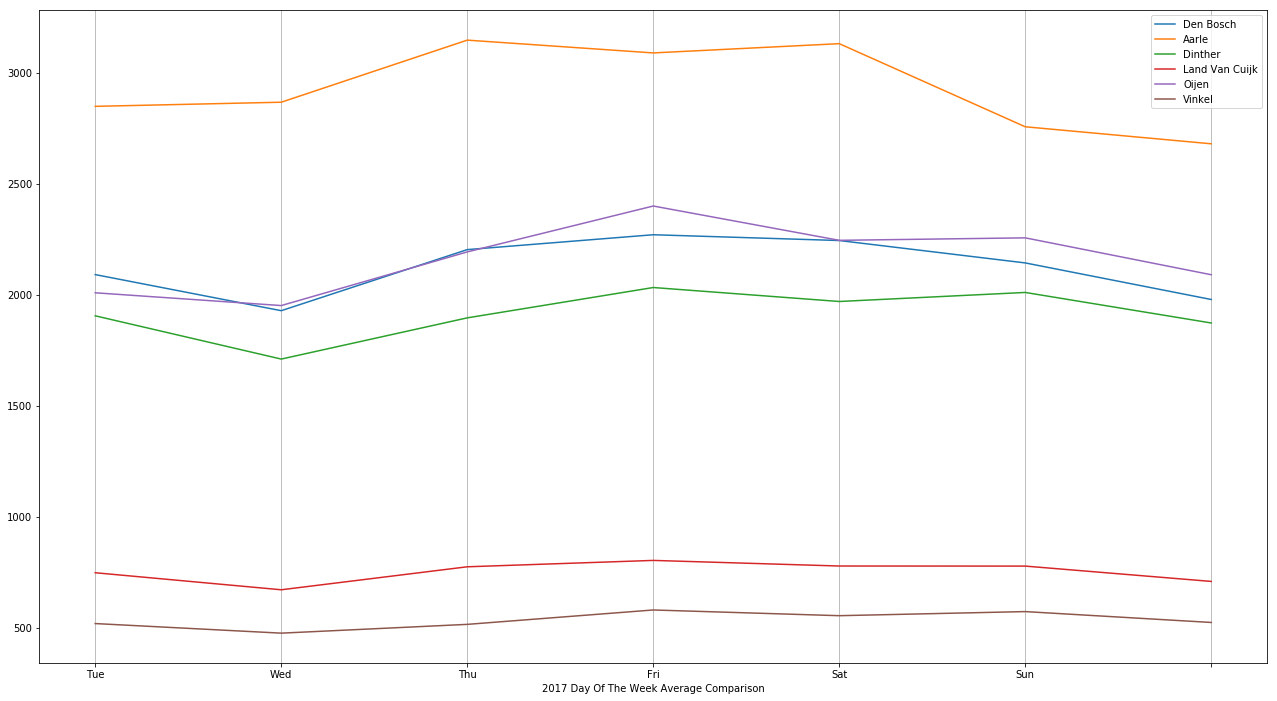

In [158]:
#create figure
plt.figure()

#set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 22
fig_size[1] = 12

#Create a plot...
db17p = db17w.plot()

#...and create subplots linking to the previous plot
aa17p = aa17w.plot(ax=db17p)
di17p = di17w.plot(ax=aa17p)
la17p = la17w.plot(ax=di17p)
oi17p = oi17w.plot(ax=la17p)
vi17p = vi17w.plot(ax=oi17p)

#set labels (in order)
db17p.legend(labels=["Den Bosch", "Aarle", "Dinther","Land Van Cuijk", "Oijen", "Vinkel"])

#Set X axis name
db17p.set_xlabel("2017 Day Of The Week Average Comparison")

#set X axis labels
labels = [''] * 7
labels[0] = 'Mon'
labels[1] = 'Tue'
labels[2] = 'Wed'
labels[3] = 'Thu'
labels[4] = 'Fri'
labels[5] = 'Sat'
labels[6] = 'Sun'

db17p.set_xticklabels(labels)


plt.grid(axis = "x")
    

#Show
fig = db17p.get_figure()
#fig.savefig("pytoplot.png")

In [ ]:
#Boxplotting:

In [192]:
#create full dataset:
df = aa17 + db17 + di17 + la17 + oi17 + vi17

In [193]:
# Delete the "weekday" column and create it again
del df["weekday"]
df['TimeStamp'] = df.index
df['weekday'] = df['TimeStamp'].apply(lambda x: x.weekday())
del df["TimeStamp"]

In [194]:
%matplotlib inline

In [195]:
# Seaborn for plotting and styling
import seaborn as sns

[Text(0.5,0,'2017 Weekday Comparison')]

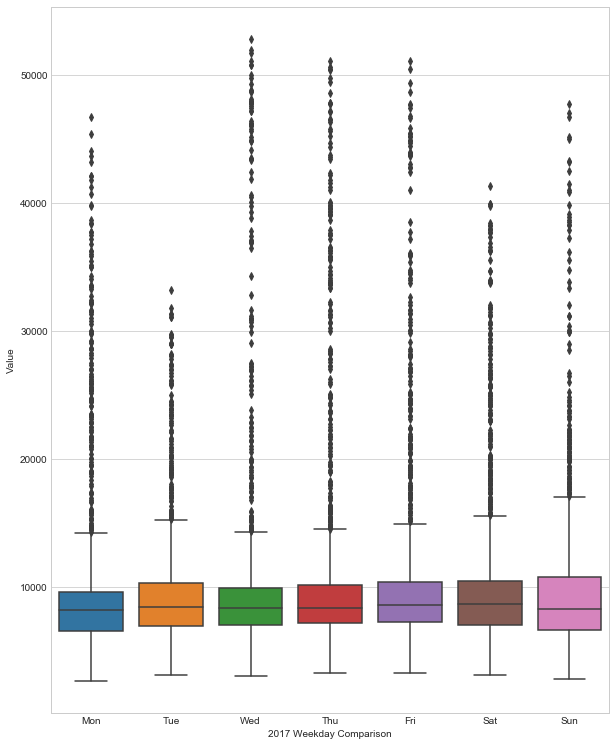

In [200]:
# Create boxplots
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(10, 13)

labels = [''] * 7
labels[0] = 'Mon'
labels[1] = 'Tue'
labels[2] = 'Wed'
labels[3] = 'Thu'
labels[4] = 'Fri'
labels[5] = 'Sat'
labels[6] = 'Sun'

sns.boxplot(ax=ax, x='weekday', y='Value', data=df).set_xticklabels(labels)
ax.set(xlabel='2017 Weekday Comparison')
